In [41]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
len(messages)

5574

In [5]:
messages[51]

'ham\tA gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;'

In [6]:
# run in cmd : jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000
for message in messages[:10]:
    print(message)


ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam

In [7]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names = ['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


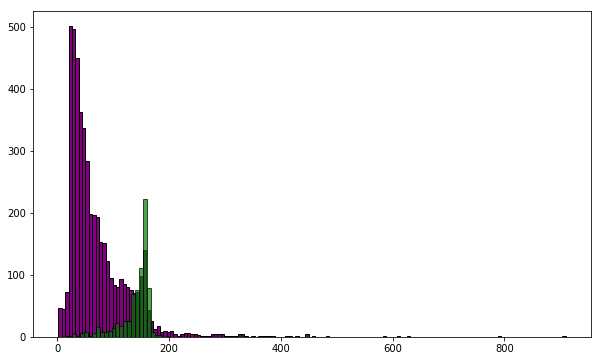

In [14]:
plt.figure(figsize=(10,6))
plt.hist(messages[messages['label']=='ham']['length'],bins=150,edgecolor='k',color ='purple')
plt.hist(messages[messages['label']=='spam']['length'],bins=30,edgecolor='k',color ='green',alpha = 0.7)
plt.show()


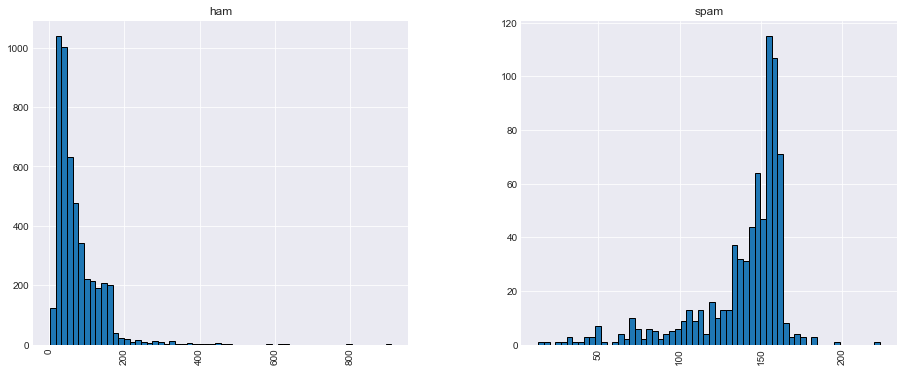

In [15]:
# same plot as above
sns.set_style('darkgrid')
messages.hist(column='length',by='label',figsize=(15,6),bins=60,edgecolor='k')
plt.show()

In [16]:
messages.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# NLP

In [42]:
import string

In [65]:
mess = 'Sample Message Notice : Its has punctuation'

In [66]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
nopunc = [char for char in mess if char not in string.punctuation] # its list comprehension

In [68]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 ' ',
 'I',
 't',
 's',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [69]:
from nltk.corpus import stopwords

In [94]:
#stopwords.words('english')

In [71]:
nopunc = ''.join(nopunc) # this not SQL join  # it commands to join all elements together

In [72]:
nopunc

'Sample Message Notice  Its has punctuation'

** FOR EAXMPLE**

In [73]:
x = ['a','b','c','d']

In [74]:
x

['a', 'b', 'c', 'd']

In [75]:
''.join(x) # it commands to join all elements together

'abcd'

In [76]:
'++'.join(x)

'a++b++c++d'

In [77]:
nopunc

'Sample Message Notice  Its has punctuation'

In [78]:
nopunc.split()

['Sample', 'Message', 'Notice', 'Its', 'has', 'punctuation']

In [88]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [89]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

**lets put this all together into a function **

In [100]:
def text_process(mess):
    '''
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words       
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [101]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

# Vectorization

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
vectorizer = CountVectorizer(analyzer=text_process)

In [110]:
bow_transformer = vectorizer.fit(messages['message'])

In [157]:
#print(len(bow_transformer.vocabulary_))

In [150]:
#mess4 = messages['message'][3]

In [151]:
#mess4

In [152]:
#bow4 = bow_transformer.transform([mess4])

In [153]:
#print(bow4)

In [155]:
#print(bow4.shape)

In [156]:
#bow_transformer.get_feature_names()[4068]

In [127]:
messages_bow = bow_transformer.transform(messages['message'])

In [128]:
print('Shape of Sparse Matrix : {}'.format(messages_bow.shape))

Shape of Sparse Matrix : (5572, 11425)


# Normalization

In [138]:
from sklearn.feature_extraction.text import TfidfTransformer

In [139]:
tfidf= TfidfTransformer()

In [140]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [147]:
#tfidf4 =tfidf_transformer.transform(bow4)

In [148]:
#print(tfidf4)

In [149]:
#inverse document frequency for a specific word
#tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

** Converting bag of words corpus into a TF-IDF corpus**

In [158]:
messages_tfidf =tfidf_transformer.transform(messages_bow)

# Training the model

In [159]:
from sklearn.naive_bayes import MultinomialNB

In [175]:
spam_detect_model = MultinomialNB()

In [189]:
from sklearn.model_selection import train_test_split

In [208]:
x = messages_tfidf
y = messages['label']
test_size = 0.30
seed = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [209]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [210]:
kfold = KFold(n_splits=10,random_state=seed)
alpha_grid = range(1,5)
param_grid = dict(alpha = alpha_grid)

In [211]:
grid_acc = GridSearchCV(spam_detect_model,param_grid=param_grid,cv=kfold, scoring='accuracy',n_jobs = -1,verbose = 3)
grid_roc = GridSearchCV(spam_detect_model,param_grid=param_grid,cv=kfold, scoring='roc_auc',n_jobs = -1,verbose = 3)

In [212]:
grid_acc_result = grid_acc.fit(x_train,y_train)
#grid_roc_result = grid_roc.fit(x_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.2s finished


In [213]:
spam_pred = grid_acc.predict(x_test)

In [214]:
from sklearn.metrics import confusion_matrix,classification_report

In [216]:
print(classification_report(y_test,spam_pred))
print('\n')
print(confusion_matrix(y_test,spam_pred))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1475
       spam       1.00      0.64      0.78       197

avg / total       0.96      0.96      0.95      1672



[[1475    0]
 [  71  126]]


# Alternative way to do all the steps throgh pipeline. we will vetorize, normalize and fit the model by pipeline

In [1]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords

In [2]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names = ['label','message'])

In [3]:
def text_process(mess):
    '''
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words       
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,KFold,GridSearchCV

In [5]:
x = messages['message']
y = messages['label']
test_size = 0.30
seed = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [6]:
kfold = KFold(n_splits=10,random_state=seed)
alpha_grid = range(1,5)
param_grid = dict(alpha = alpha_grid)

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
pipeline = Pipeline([
           ('bow', CountVectorizer(analyzer=text_process)),
           ('tfidf', TfidfTransformer()),
           ('GridSearch', GridSearchCV(MultinomialNB(),param_grid=param_grid,cv=kfold, scoring='accuracy',n_jobs = -1,verbose = 3))
    
     ])

In [9]:
pipeline.fit(x_train,y_train)
# ('classifier',MultinomialNB()),

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    4.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.7s finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000026DF9677268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...ch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=3))])

In [10]:
pipe_pred = pipeline.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(classification_report(y_test,pipe_pred))
print('\n')
print(confusion_matrix(y_test,pipe_pred))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1475
       spam       1.00      0.65      0.79       197

avg / total       0.96      0.96      0.96      1672



[[1475    0]
 [  68  129]]
